In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Function to apply a transformation matrix to an image
def apply_transformation(image, transformation_matrix):
    height, width = image.shape[:2]
    transformed_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            vec = np.array([j, i, 1])
            new_vec = np.dot(transformation_matrix, vec)
            new_x, new_y = int(new_vec[0]), int(new_vec[1])
            if 0 <= new_x < width and 0 <= new_y < height:
                transformed_image[new_y, new_x] = image[i, j]
    return transformed_image

def get_translation_matrix(tx, ty):
    return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])

def get_rotation_matrix(angle, center):
    angle = np.deg2rad(angle)
    cx, cy = center
    return np.array([[np.cos(angle), -np.sin(angle), cx - cx * np.cos(angle) + cy * np.sin(angle)],
                     [np.sin(angle), np.cos(angle), cy - cx * np.sin(angle) - cy * np.cos(angle)],
                     [0, 0, 1]])

def get_shearing_matrix(shx, shy):
    return np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])




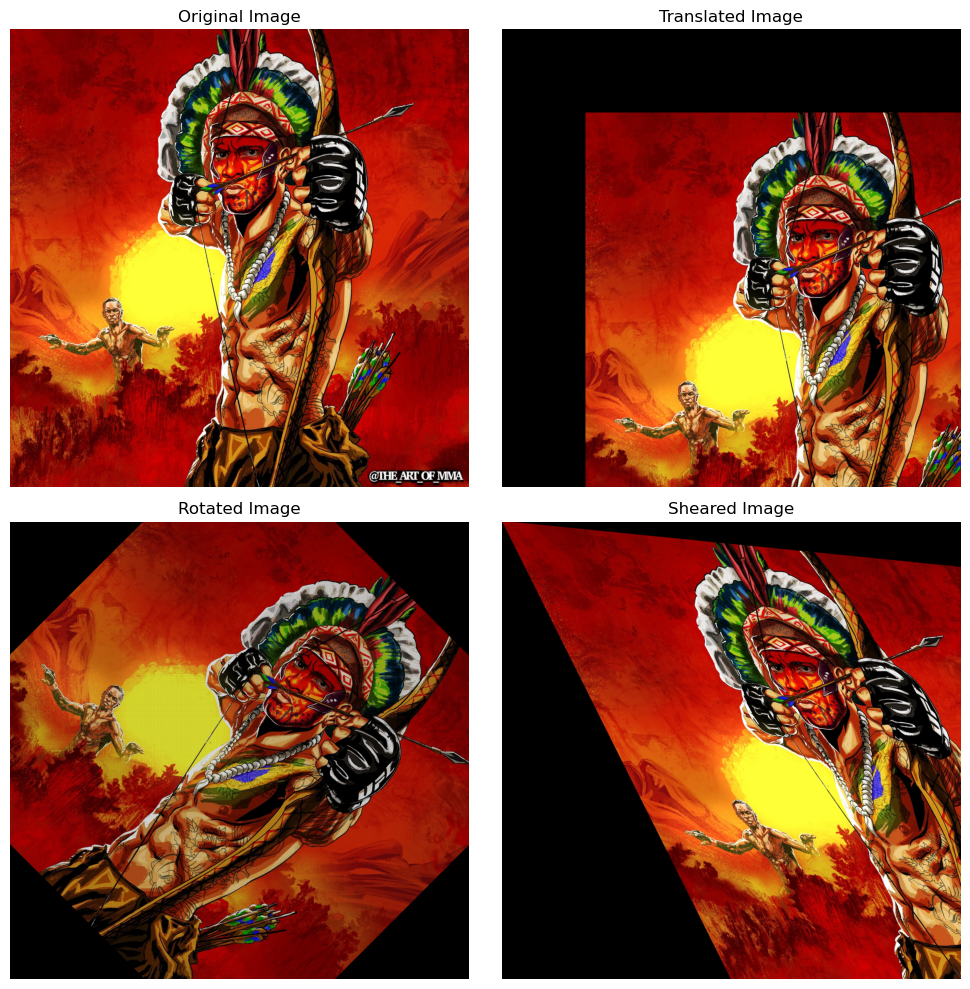

In [3]:
image = cv2.imread("ap.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

# Perform transformations
translation_matrix = get_translation_matrix(500, 500)
translated_image = apply_transformation(image, translation_matrix)

rotation_matrix = get_rotation_matrix(45, (image.shape[1] // 2, image.shape[0] // 2))
rotated_image = apply_transformation(image, rotation_matrix)

shearing_matrix = get_shearing_matrix(0.5, 0.1)
sheared_image = apply_transformation(image, shearing_matrix)

# Convert transformed images to PIL images for display
translated_image = Image.fromarray(translated_image)
rotated_image = Image.fromarray(rotated_image)
sheared_image = Image.fromarray(sheared_image)

# Display the original and transformed images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Translated Image")
plt.imshow(translated_image)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Sheared Image")
plt.imshow(sheared_image)
plt.axis('off')


plt.tight_layout()
plt.show()

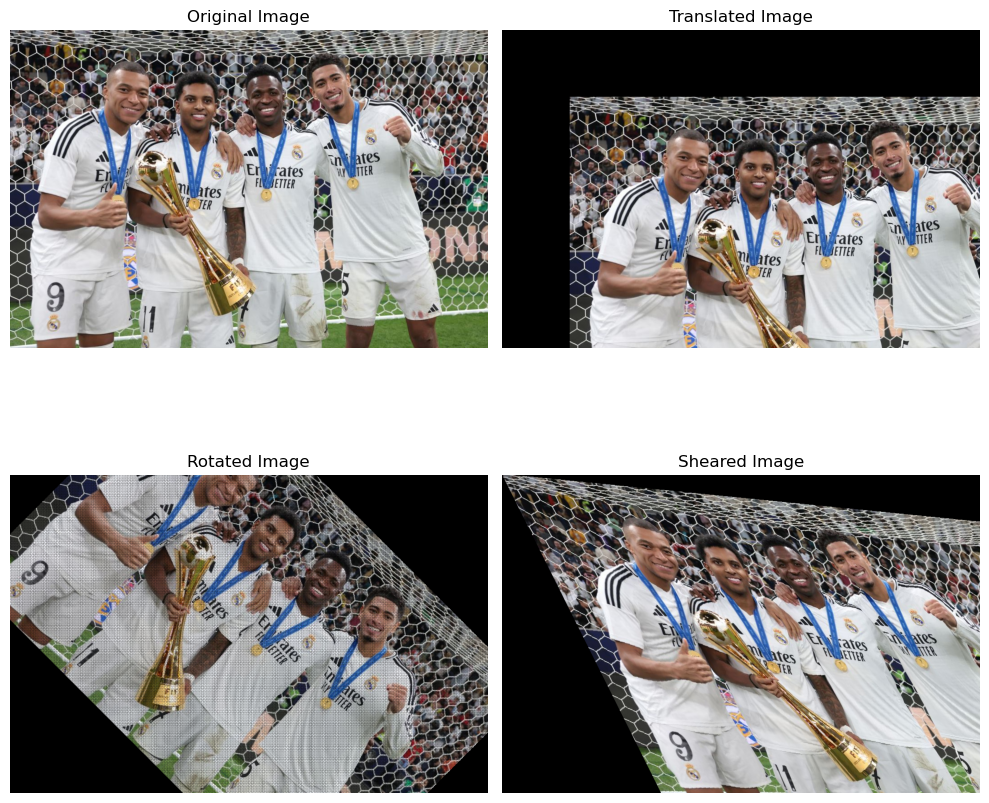

In [4]:
image = cv2.imread("rm.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
# Perform transformations
translation_matrix = get_translation_matrix(150,150)
translated_image = apply_transformation(image, translation_matrix)

rotation_matrix = get_rotation_matrix(45, (image.shape[1] // 2, image.shape[0] // 2))
rotated_image = apply_transformation(image, rotation_matrix)

shearing_matrix = get_shearing_matrix(0.5, 0.1)
sheared_image = apply_transformation(image, shearing_matrix)

# Convert transformed images to PIL images for display
translated_image = Image.fromarray(translated_image)
rotated_image = Image.fromarray(rotated_image)
sheared_image = Image.fromarray(sheared_image)

# Display the original and transformed images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Translated Image")
plt.imshow(translated_image)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Sheared Image")
plt.imshow(sheared_image)
plt.axis('off')

plt.tight_layout()
plt.show()

# REFLECTION

In [6]:
# Function to reflect an image
def reflect_image(image, axis):
    height, width = image.shape[:2]
    reflected_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            if axis == 'horizontal':
                new_x, new_y = width - 1 - j, i
            elif axis == 'vertical':
                new_x, new_y = j, height - 1 - i
            reflected_image[new_y, new_x] = image[i, j]
    
    return reflected_image

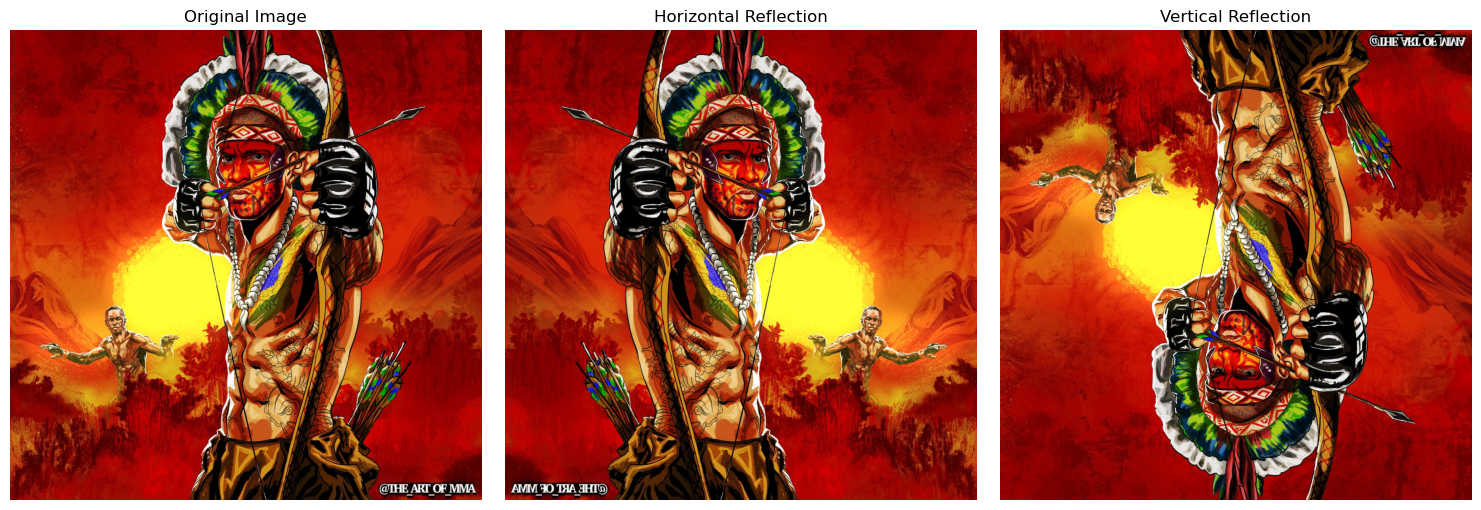

In [7]:
image = cv2.imread("ap.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Perform reflections
horizontal_reflected_image = reflect_image(image, 'horizontal')
vertical_reflected_image = reflect_image(image, 'vertical')

# Display the original and reflected images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Horizontal Reflection")
plt.imshow(horizontal_reflected_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Vertical Reflection")
plt.imshow(vertical_reflected_image)
plt.axis('off')

plt.tight_layout()
plt.show()

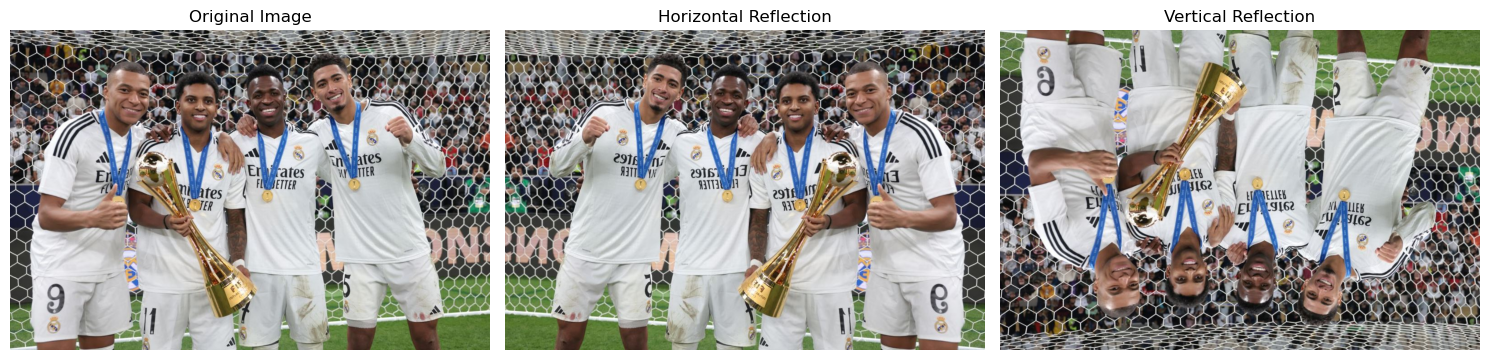

In [8]:
image = cv2.imread("rm.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Perform reflections
horizontal_reflected_image = reflect_image(image, 'horizontal')
vertical_reflected_image = reflect_image(image, 'vertical')

# Display the original and reflected images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Horizontal Reflection")
plt.imshow(horizontal_reflected_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Vertical Reflection")
plt.imshow(vertical_reflected_image)
plt.axis('off')

plt.tight_layout()
plt.show()

# SCALING

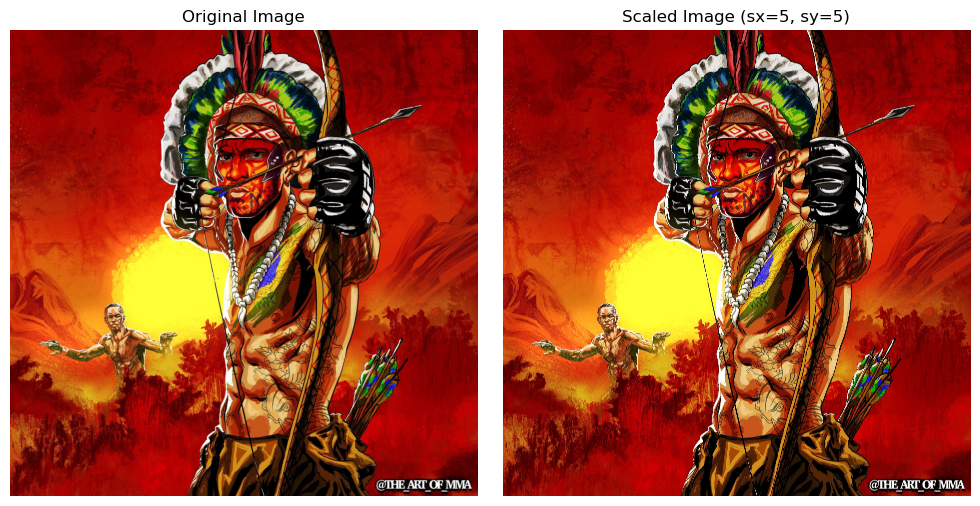

In [5]:
# Function to apply scaling to an image
def apply_scaling(image, sx, sy):
    height, width = image.shape[:2]
    new_height, new_width = int(height * sy), int(width * sx)
    scaled_image = np.zeros((new_height, new_width, 3), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):
            src_x = int(j / sx)
            src_y = int(i / sy)
            if 0 <= src_x < width and 0 <= src_y < height:
                scaled_image[i, j] = image[src_y, src_x]

    return scaled_image

# Read an image file using OpenCV
image = cv2.imread("ap.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Perform scaling
sx, sy = 5, 5  # Scaling factors
scaled_image = apply_scaling(image, sx, sy)

# Convert scaled image to PIL image for display
scaled_image_pil = Image.fromarray(scaled_image)

# Display the original and scaled images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Scaled Image (sx={sx}, sy={sy})")
plt.imshow(scaled_image_pil)
plt.axis('off')

plt.tight_layout()
plt.show()

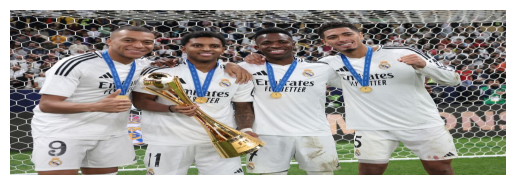

In [10]:
img=cv2.imread("rm.png")
img_array=np.array(img)
h,w,c=img_array.shape
Sx = 10.0  
Sy = 5.0 

new_w = int(w * Sx)
new_h = int(h * Sy)

img_scaled = np.zeros((new_h, new_w, c), dtype=np.uint8)

for y_new in range(new_h):
    for x_new in range(new_w):
        x_old = int(x_new / Sx)
        y_old = int(y_new / Sy)
        if 0 <= x_old < w and 0 <= y_old < h:
            img_scaled[y_new, x_new] = img_array[y_old, x_old]
img_scaled_rgb = cv2.cvtColor(img_scaled, cv2.COLOR_BGR2RGB)
plt.imshow(img_scaled_rgb)
plt.axis("off")
plt.show()

In [ ]:
img=cv2.imread("ap.png")
img_array=np.array(img)
h,w,c=img_array.shape
Sx = 10.0  
Sy = 5.0 

new_w = int(w * Sx)
new_h = int(h * Sy)

img_scaled = np.zeros((new_h, new_w, c), dtype=np.uint8)

for y_new in range(new_h):
    for x_new in range(new_w):
        x_old = int(x_new / Sx)
        y_old = int(y_new / Sy)
        if 0 <= x_old < w and 0 <= y_old < h:
            img_scaled[y_new, x_new] = img_array[y_old, x_old]
img_scaled_rgb = cv2.cvtColor(img_scaled, cv2.COLOR_BGR2RGB)
plt.imshow(img_scaled_rgb)
plt.axis("off")
plt.show()